In [1]:
!pip install mlflow pycaret


In [6]:
from mlflow import *
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
import warnings
import pickle
warnings.filterwarnings("ignore")
%matplotlib inline
import pycaret
pd.options.display.max_columns=None
pd.options.display.max_rows=None
pd.options.display.max_colwidth=None

In [7]:
df=pd.read_excel("./Dataset/House_Rent_Train.xlsx")
df.head()

id  type       locality      activation_date  \
0  ff8081815733a243015733b2876600a6  BHK2            NaN     21-04-2018 14:44   
1  ff8081815ee25e15015ee50004da2acd  BHK2      Bellandur  2017-09-10 12:48:00   
2  ff80818163f29c9e0163f46770b873e7  BHK3  Thiruvanmiyur  2018-12-06 22:02:00   
3  ff80818164b68a700164b74b1b247a1d  BHK1      Attiguppe     20-07-2018 16:22   
4  ff80818163b1faf00163b4b9b8a163b1  BHK3      Kodihalli     31-05-2018 17:41   

    latitude  longitude lease_type  gym  lift  swimming_pool  negotiable  \
0  12.934471  77.634471     FAMILY    1     1              1           0   
1  12.929557  77.672280     ANYONE    0     1              0           1   
2  12.982870  80.262012     FAMILY    0     1              0           0   
3  12.955991  77.531634     FAMILY    0     0              0           1   
4  12.963903  77.649446     FAMILY    0     0              0           1   

       furnishing      parking  property_size  property_age  bathroom facing  \
0  SEMI_FURNISHED         BOTH           1250          25.0       2.0      E   
1  SEMI_FURNISHED         BOTH           1400           4.0       2.0     NE   
2  SEMI_FURNISHED         BOTH           1350           6.0       3.0      E   
3  SEMI_FURNISHED  TWO_WHEELER            600           3.0       1.0      E   
4  SEMI_FURNISHED         BOTH           1500          15.0       3.0      E   

   cup_board  floor  total_floor  \
0        2.0    6.0         12.0   
1        2.0    3.0          4.0   
2        3.0    1.0          5.0   
3        1.0    1.0          2.0   
4        4.0    0.0          0.0   

                                                                                                                                                                                                                                               amenities  \
0                 {"LIFT":true,"GYM":true,"INTERNET":true,"AC":false,"CLUB":true,"INTERCOM":true,"POOL":true,"CPA":true,"FS":true,"SERVANT":false,"SECURITY":true,"SC":true,"GP":true,"PARK":false,"RWH":true,"STP":true,"HK":false,"PB":true,"VP":true}   
1          {"LIFT":true,"GYM":false,"INTERNET":false,"AC":false,"CLUB":false,"INTERCOM":false,"POOL":false,"CPA":false,"FS":false,"SERVANT":false,"SECURITY":true,"SC":true,"GP":false,"PARK":true,"RWH":true,"STP":true,"HK":false,"PB":true,"VP":true}   
2        {"LIFT":true,"GYM":false,"INTERNET":false,"AC":false,"CLUB":false,"INTERCOM":false,"POOL":false,"CPA":true,"FS":false,"SERVANT":false,"SECURITY":false,"SC":true,"GP":false,"PARK":true,"RWH":false,"STP":false,"HK":false,"PB":true,"VP":true}   
3  {"LIFT":false,"GYM":false,"INTERNET":false,"AC":false,"CLUB":false,"INTERCOM":false,"POOL":false,"CPA":false,"FS":false,"SERVANT":false,"SECURITY":false,"SC":false,"GP":false,"PARK":false,"RWH":false,"STP":false,"HK":false,"PB":false,"VP":false}   
4     {"LIFT":false,"GYM":false,"INTERNET":false,"AC":false,"CLUB":false,"INTERCOM":false,"POOL":false,"CPA":true,"FS":false,"SERVANT":false,"SECURITY":false,"SC":false,"GP":false,"PARK":true,"RWH":false,"STP":false,"HK":false,"PB":false,"VP":true}   

  water_supply building_type  balconies     rent  
0    CORP_BORE            AP        2.0  40000.0  
1  CORPORATION            AP        2.0  22000.0  
2    CORP_BORE            AP        3.0  28000.0  
3  CORPORATION            IH        0.0   8000.0  
4  CORPORATION            IH        1.0  45000.0

In [8]:
df.shape

(20555, 25)

In [9]:
for i in range(1,24):
    df.drop(df[df['id'] == i].index, inplace=True)

In [10]:
df.isnull().sum()

id                   0
type                18
locality           137
activation_date      0
latitude             0
longitude            0
lease_type           0
gym                  0
lift                 0
swimming_pool        0
negotiable           0
furnishing           0
parking              0
property_size        0
property_age         0
bathroom             0
facing               0
cup_board            0
floor                0
total_floor          0
amenities            0
water_supply         0
building_type        0
balconies            0
rent                 0
dtype: int64

In [11]:
amenities=df['amenities']
amenities

0                       {"LIFT":true,"GYM":true,"INTERNET":true,"AC":false,"CLUB":true,"INTERCOM":true,"POOL":true,"CPA":true,"FS":true,"SERVANT":false,"SECURITY":true,"SC":true,"GP":true,"PARK":false,"RWH":true,"STP":true,"HK":false,"PB":true,"VP":true}
1                {"LIFT":true,"GYM":false,"INTERNET":false,"AC":false,"CLUB":false,"INTERCOM":false,"POOL":false,"CPA":false,"FS":false,"SERVANT":false,"SECURITY":true,"SC":true,"GP":false,"PARK":true,"RWH":true,"STP":true,"HK":false,"PB":true,"VP":true}
2              {"LIFT":true,"GYM":false,"INTERNET":false,"AC":false,"CLUB":false,"INTERCOM":false,"POOL":false,"CPA":true,"FS":false,"SERVANT":false,"SECURITY":false,"SC":true,"GP":false,"PARK":true,"RWH":false,"STP":false,"HK":false,"PB":true,"VP":true}
3        {"LIFT":false,"GYM":false,"INTERNET":false,"AC":false,"CLUB":false,"INTERCOM":false,"POOL":false,"CPA":false,"FS":false,"SERVANT":false,"SECURITY":false,"SC":false,"GP":false,"PARK":false,"RWH":false,"STP":false,"HK":false,"PB

In [12]:
amenities_value=[]
for i in range(len(df['amenities'])):
    amenities_value.append(df['amenities'][i])

In [13]:
import json
amenities_dicts=[json.loads(value) for value in amenities_value]
dff=pd.DataFrame(amenities_dicts)


In [14]:
for i in dff.columns:
    df[i]=dff[i]

In [15]:
df.describe()

latitude     longitude           gym          lift  swimming_pool  \
count  20532.000000  20532.000000  20532.000000  20532.000000   20532.000000   
mean      12.945748     77.637295      0.226865      0.361777       0.174849   
std        0.029601      0.110525      0.418815      0.480526       0.379847   
min       12.900004     77.500072      0.000000      0.000000       0.000000   
25%       12.918176     77.572068      0.000000      0.000000       0.000000   
50%       12.943790     77.633506      0.000000      0.000000       0.000000   
75%       12.970979     77.695723      0.000000      1.000000       0.000000   
max       12.999999     80.266346      1.000000      1.000000       1.000000   

         negotiable  property_size  property_age      bathroom     cup_board  \
count  20532.000000   20532.000000  20532.000000  20532.000000  20532.000000   
mean       0.711572    1061.938145      5.769920      1.858465      4.549922   
std        0.453042     591.320502      6.350989      0.710926    335.154787   
min        0.000000       1.000000     -1.000000      1.000000      0.000000   
25%        0.000000     700.000000      1.000000      1.000000      1.000000   
50%        1.000000    1047.000000      5.000000      2.000000      2.000000   
75%        1.000000    1284.000000     10.000000      2.000000      3.000000   
max        1.000000   50000.000000    400.000000     21.000000  48026.000000   

              floor   total_floor     balconies          rent  
count  20532.000000  20532.000000  20532.000000  20532.000000  
mean       1.874050      3.801335      1.149523  19056.733148  
std        2.183982      3.183697      0.993549   8434.029016  
min        0.000000      0.000000      0.000000   8000.000000  
25%        1.000000      2.000000      0.000000  12500.000000  
50%        1.000000      3.000000      1.000000  17500.000000  
75%        2.000000      4.000000      2.000000  24000.000000  
max       25.000000     26.000000     13.000000  50000.000000

In [16]:
df.drop(['amenities','id'],axis=1,inplace=True)
df.head()

type       locality      activation_date   latitude  longitude lease_type  \
0  BHK2            NaN     21-04-2018 14:44  12.934471  77.634471     FAMILY   
1  BHK2      Bellandur  2017-09-10 12:48:00  12.929557  77.672280     ANYONE   
2  BHK3  Thiruvanmiyur  2018-12-06 22:02:00  12.982870  80.262012     FAMILY   
3  BHK1      Attiguppe     20-07-2018 16:22  12.955991  77.531634     FAMILY   
4  BHK3      Kodihalli     31-05-2018 17:41  12.963903  77.649446     FAMILY   

   gym  lift  swimming_pool  negotiable      furnishing      parking  \
0    1     1              1           0  SEMI_FURNISHED         BOTH   
1    0     1              0           1  SEMI_FURNISHED         BOTH   
2    0     1              0           0  SEMI_FURNISHED         BOTH   
3    0     0              0           1  SEMI_FURNISHED  TWO_WHEELER   
4    0     0              0           1  SEMI_FURNISHED         BOTH   

   property_size  property_age  bathroom facing  cup_board  floor  \
0           1250          25.0       2.0      E        2.0    6.0   
1           1400           4.0       2.0     NE        2.0    3.0   
2           1350           6.0       3.0      E        3.0    1.0   
3            600           3.0       1.0      E        1.0    1.0   
4           1500          15.0       3.0      E        4.0    0.0   

   total_floor water_supply building_type  balconies     rent   LIFT    GYM  \
0         12.0    CORP_BORE            AP        2.0  40000.0   True   True   
1          4.0  CORPORATION            AP        2.0  22000.0   True  False   
2          5.0    CORP_BORE            AP        3.0  28000.0   True  False   
3          2.0  CORPORATION            IH        0.0   8000.0  False  False   
4          0.0  CORPORATION            IH        1.0  45000.0  False  False   

   INTERNET     AC   CLUB  INTERCOM   POOL    CPA     FS SERVANT  SECURITY  \
0      True  False   True      True   True   True   True   False      True   
1     False  False  False     False  False  False  False   False      True   
2     False  False  False     False  False   True  False   False     False   
3     False  False  False     False  False  False  False   False     False   
4     False  False  False     False  False   True  False   False     False   

      SC     GP   PARK    RWH    STP     HK     PB     VP  
0   True   True  False   True   True  False   True   True  
1   True  False   True   True   True  False   True   True  
2   True  False   True  False  False  False   True   True  
3  False  False  False  False  False  False  False  False  
4  False  False   True  False  False  False  False   True

In [17]:
df.drop(['gym','lift','swimming_pool'],axis=1,inplace=True)

In [18]:
df.isna().sum()

type                 18
locality            137
activation_date       0
latitude              0
longitude             0
lease_type            0
negotiable            0
furnishing            0
parking               0
property_size         0
property_age          0
bathroom              0
facing                0
cup_board             0
floor                 0
total_floor           0
water_supply          0
building_type         0
balconies             0
rent                  0
LIFT                  0
GYM                  62
INTERNET              0
AC                    0
CLUB               1067
INTERCOM              0
POOL                  0
CPA                1067
FS                    0
SERVANT            1067
SECURITY              0
SC                    0
GP                 1067
PARK                  0
RWH                1067
STP                1067
HK                    0
PB                    0
VP                 1067
dtype: int64

In [19]:
column=dff.columns
df[column]=df[column].fillna(False)

In [20]:
replace_value={'bhk2':'BHK2','bhk3': 'BHK3','1BHK1':'BHK1'}
df['type']=df['type'].replace(replace_value)

In [21]:
df=df.dropna(axis=0)


In [22]:
df.isna().sum()

type               0
locality           0
activation_date    0
latitude           0
longitude          0
lease_type         0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
water_supply       0
building_type      0
balconies          0
rent               0
LIFT               0
GYM                0
INTERNET           0
AC                 0
CLUB               0
INTERCOM           0
POOL               0
CPA                0
FS                 0
SERVANT            0
SECURITY           0
SC                 0
GP                 0
PARK               0
RWH                0
STP                0
HK                 0
PB                 0
VP                 0
dtype: int64

In [23]:
df.head()

type              locality      activation_date   latitude  longitude  \
1  BHK2             Bellandur  2017-09-10 12:48:00  12.929557  77.672280   
2  BHK3         Thiruvanmiyur  2018-12-06 22:02:00  12.982870  80.262012   
3  BHK1             Attiguppe     20-07-2018 16:22  12.955991  77.531634   
4  BHK3             Kodihalli     31-05-2018 17:41  12.963903  77.649446   
5  BHK1  Seetharampalya,Hoodi     24-10-2017 18:29  12.986196  77.718314   

  lease_type  negotiable      furnishing      parking  property_size  \
1     ANYONE           1  SEMI_FURNISHED         BOTH           1400   
2     FAMILY           0  SEMI_FURNISHED         BOTH           1350   
3     FAMILY           1  SEMI_FURNISHED  TWO_WHEELER            600   
4     FAMILY           1  SEMI_FURNISHED         BOTH           1500   
5     FAMILY           1  SEMI_FURNISHED         BOTH           1080   

   property_age  bathroom facing  cup_board  floor  total_floor water_supply  \
1           4.0       2.0     NE        2.0    3.0          4.0  CORPORATION   
2           6.0       3.0      E        3.0    1.0          5.0    CORP_BORE   
3           3.0       1.0      E        1.0    1.0          2.0  CORPORATION   
4          15.0       3.0      E        4.0    0.0          0.0  CORPORATION   
5           0.0       2.0      E        1.0    3.0          5.0    CORP_BORE   

  building_type  balconies     rent   LIFT    GYM  INTERNET     AC   CLUB  \
1            AP        2.0  22000.0   True  False     False  False  False   
2            AP        3.0  28000.0   True  False     False  False  False   
3            IH        0.0   8000.0  False  False     False  False  False   
4            IH        1.0  45000.0  False  False     False  False  False   
5            AP        2.0  18000.0   True   True     False  False   True   

   INTERCOM   POOL    CPA     FS  SERVANT  SECURITY     SC     GP   PARK  \
1     False  False  False  False    False      True   True  False   True   
2     False  False   True  False    False     False   True  False   True   
3     False  False  False  False    False     False  False  False  False   
4     False  False   True  False    False     False  False  False   True   
5     False   True   True   True    False      True  False  False  False   

     RWH    STP     HK     PB     VP  
1   True   True  False   True   True  
2  False  False  False   True   True  
3  False  False  False  False  False  
4  False  False  False  False   True  
5  False  False  False   True  False

In [24]:
len(df['locality'].unique())

1917

In [25]:
df['lease_type'].unique()

array(['ANYONE', 'FAMILY', 'BACHELOR', 'COMPANY'], dtype=object)

In [26]:
df['furnishing'].unique()

array(['SEMI_FURNISHED', 'FULLY_FURNISHED', 'NOT_FURNISHED'], dtype=object)

In [27]:
df['parking'].unique()

array(['BOTH', 'TWO_WHEELER', 'NONE', 'FOUR_WHEELER'], dtype=object)

In [28]:
df['facing'].unique()

array(['NE', 'E', 'S', 'N', 'SE', 'W', 'NW', 'SW'], dtype=object)

In [29]:
df['water_supply'].unique()

array(['CORPORATION', 'CORP_BORE', 'BOREWELL'], dtype=object)

In [30]:
df['building_type'].unique()

array(['AP', 'IH', 'IF', 'GC'], dtype=object)

In [31]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

In [32]:
category=['type','lease_type','furnishing','parking','facing','water_supply','building_type']
for i in category:
    print(oe.fit_transform(df[[i]]))
    df[i]=oe.fit_transform(df[[i]])


[[1.]
 [2.]
 [0.]
 ...
 [1.]
 [1.]
 [0.]]
[[0.]
 [3.]
 [3.]
 ...
 [3.]
 [3.]
 [0.]]
[[2.]
 [2.]
 [2.]
 ...
 [2.]
 [2.]
 [2.]]
[[0.]
 [0.]
 [3.]
 ...
 [0.]
 [0.]
 [3.]]
[[2.]
 [0.]
 [0.]
 ...
 [7.]
 [0.]
 [0.]]
[[1.]
 [2.]
 [1.]
 ...
 [0.]
 [2.]
 [1.]]
[[0.]
 [0.]
 [3.]
 ...
 [0.]
 [0.]
 [3.]]


In [33]:
df.head()

type              locality      activation_date   latitude  longitude  \
1   1.0             Bellandur  2017-09-10 12:48:00  12.929557  77.672280   
2   2.0         Thiruvanmiyur  2018-12-06 22:02:00  12.982870  80.262012   
3   0.0             Attiguppe     20-07-2018 16:22  12.955991  77.531634   
4   2.0             Kodihalli     31-05-2018 17:41  12.963903  77.649446   
5   0.0  Seetharampalya,Hoodi     24-10-2017 18:29  12.986196  77.718314   

   lease_type  negotiable  furnishing  parking  property_size  property_age  \
1         0.0           1         2.0      0.0           1400           4.0   
2         3.0           0         2.0      0.0           1350           6.0   
3         3.0           1         2.0      3.0            600           3.0   
4         3.0           1         2.0      0.0           1500          15.0   
5         3.0           1         2.0      0.0           1080           0.0   

   bathroom  facing  cup_board  floor  total_floor  water_supply  \
1       2.0     2.0        2.0    3.0          4.0           1.0   
2       3.0     0.0        3.0    1.0          5.0           2.0   
3       1.0     0.0        1.0    1.0          2.0           1.0   
4       3.0     0.0        4.0    0.0          0.0           1.0   
5       2.0     0.0        1.0    3.0          5.0           2.0   

   building_type  balconies     rent   LIFT    GYM  INTERNET     AC   CLUB  \
1            0.0        2.0  22000.0   True  False     False  False  False   
2            0.0        3.0  28000.0   True  False     False  False  False   
3            3.0        0.0   8000.0  False  False     False  False  False   
4            3.0        1.0  45000.0  False  False     False  False  False   
5            0.0        2.0  18000.0   True   True     False  False   True   

   INTERCOM   POOL    CPA     FS  SERVANT  SECURITY     SC     GP   PARK  \
1     False  False  False  False    False      True   True  False   True   
2     False  False   True  False    False     False   True  False   True   
3     False  False  False  False    False     False  False  False  False   
4     False  False   True  False    False     False  False  False   True   
5     False   True   True   True    False      True  False  False  False   

     RWH    STP     HK     PB     VP  
1   True   True  False   True   True  
2  False  False  False   True   True  
3  False  False  False  False  False  
4  False  False  False  False   True  
5  False  False  False   True  False

In [34]:
df[['locality']]=oe.fit_transform(df[['locality']])

In [35]:
X=df.drop('rent',axis=1)
y=df[['rent']]

In [36]:
df['activation_date']=pd.to_datetime(df['activation_date'])

In [37]:
df.columns

Index(['type', 'locality', 'activation_date', 'latitude', 'longitude',
       'lease_type', 'negotiable', 'furnishing', 'parking', 'property_size',
       'property_age', 'bathroom', 'facing', 'cup_board', 'floor',
       'total_floor', 'water_supply', 'building_type', 'balconies', 'rent',
       'LIFT', 'GYM', 'INTERNET', 'AC', 'CLUB', 'INTERCOM', 'POOL', 'CPA',
       'FS', 'SERVANT', 'SECURITY', 'SC', 'GP', 'PARK', 'RWH', 'STP', 'HK',
       'PB', 'VP'],
      dtype='object')

In [38]:
df.describe()

type      locality      latitude     longitude    lease_type  \
count  20377.000000  20377.000000  20377.000000  20377.000000  20377.000000   
mean       1.173333    975.676891     12.945750     77.637238      1.523237   
std        0.922598    518.253979      0.029587      0.110758      1.478700   
min        0.000000      0.000000     12.900004     77.500072      0.000000   
25%        1.000000    487.000000     12.918232     77.571912      0.000000   
50%        1.000000    991.000000     12.943792     77.633367      1.000000   
75%        2.000000   1401.000000     12.970922     77.695692      3.000000   
max        5.000000   1916.000000     12.999999     80.266346      3.000000   

         negotiable    furnishing       parking  property_size  property_age  \
count  20377.000000  20377.000000  20377.000000   20377.000000  20377.000000   
mean       0.711488      1.815675      1.228689    1061.437209      5.777053   
std        0.453081      0.514592      1.390668     591.857798      6.362450   
min        0.000000      0.000000      0.000000       1.000000     -1.000000   
25%        0.000000      2.000000      0.000000     700.000000      1.000000   
50%        1.000000      2.000000      0.000000    1044.000000      5.000000   
75%        1.000000      2.000000      3.000000    1280.000000     10.000000   
max        1.000000      2.000000      3.000000   50000.000000    400.000000   

           bathroom        facing     cup_board         floor   total_floor  \
count  20377.000000  20377.000000  20377.000000  20377.000000  20377.000000   
mean       1.857732      1.589439      4.567503      1.869510      3.798106   
std        0.710933      2.357077    336.427053      2.181633      3.183849   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      0.000000      1.000000      1.000000      2.000000   
50%        2.000000      1.000000      2.000000      1.000000      3.000000   
75%        2.000000      1.000000      3.000000      2.000000      4.000000   
max       21.000000      7.000000  48026.000000     25.000000     26.000000   

       water_supply  building_type     balconies          rent  
count  20377.000000   20377.000000  20377.000000  20377.000000  
mean       1.370614       1.253030      1.147863  19048.502969  
std        0.730832       1.133583      0.993290   8433.444157  
min        0.000000       0.000000      0.000000   8000.000000  
25%        1.000000       0.000000      0.000000  12500.000000  
50%        2.000000       2.000000      1.000000  17500.000000  
75%        2.000000       2.000000      2.000000  24000.000000  
max        2.000000       3.000000     13.000000  50000.000000

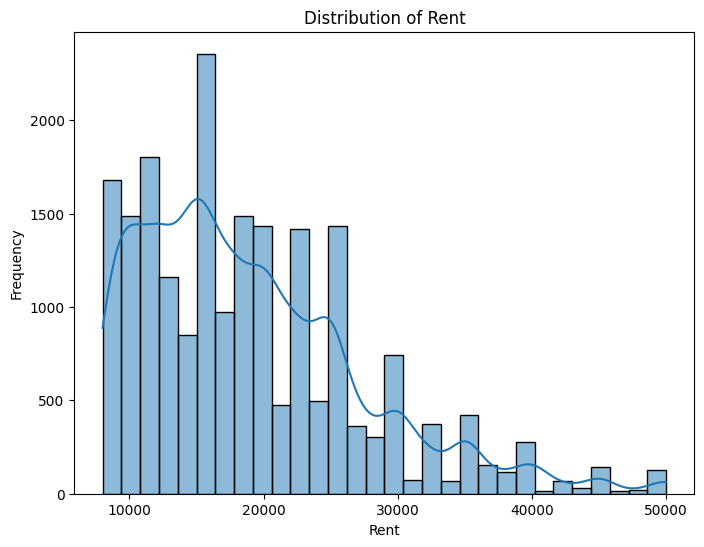

In [39]:
plt.figure(figsize=(8, 6))
sns.histplot(df['rent'], bins=30, kde=True)
plt.title('Distribution of Rent')
plt.xlabel('Rent')
plt.ylabel('Frequency')
plt.show()

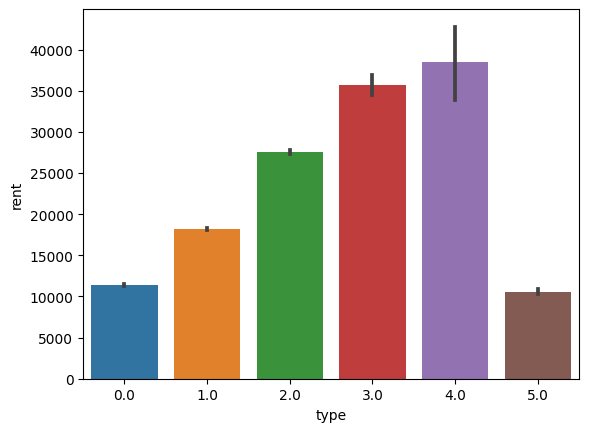

In [40]:
sns.barplot(x='type', y='rent', data=df)
plt.show()

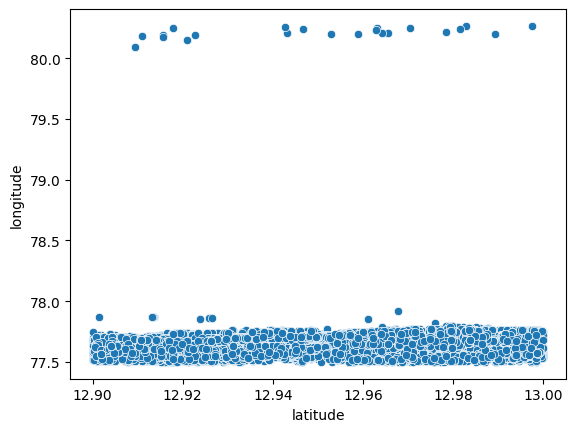

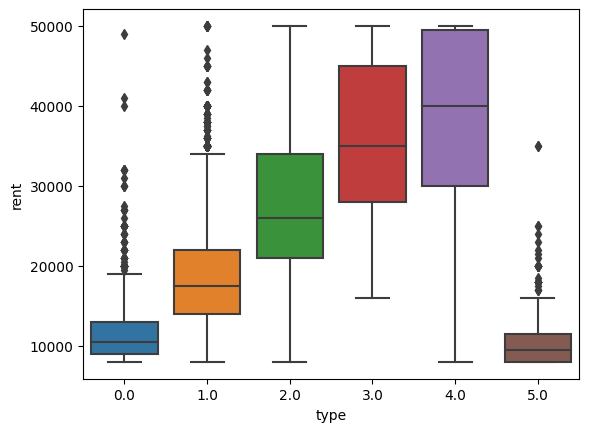

In [41]:
sns.scatterplot(x='latitude', y='longitude', data=df)
plt.show()

# Boxplot to compare numeric variables across categories
sns.boxplot(x='type', y='rent', data=df)
plt.show()

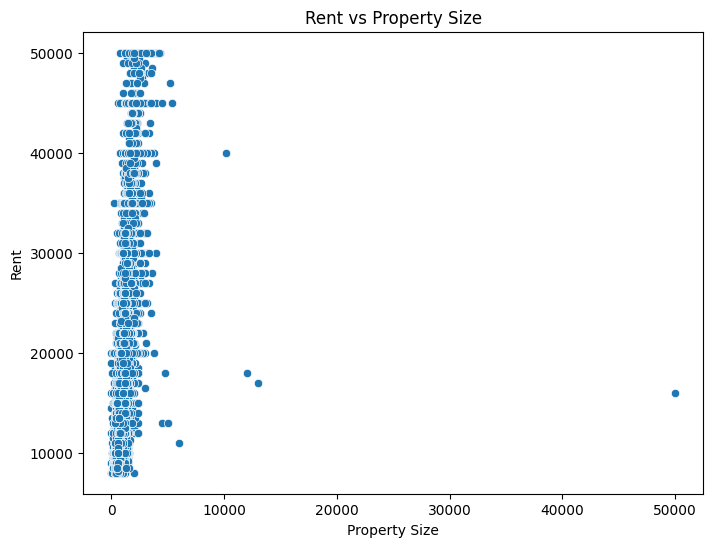

In [42]:
# Scatter plot to visualize relationship between rent and a numeric variable (e.g., property size)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='property_size', y='rent', data=df)
plt.title('Rent vs Property Size')
plt.xlabel('Property Size')
plt.ylabel('Rent')
plt.show()

# Boxplot to compare rent across categories (e.g., type of property)


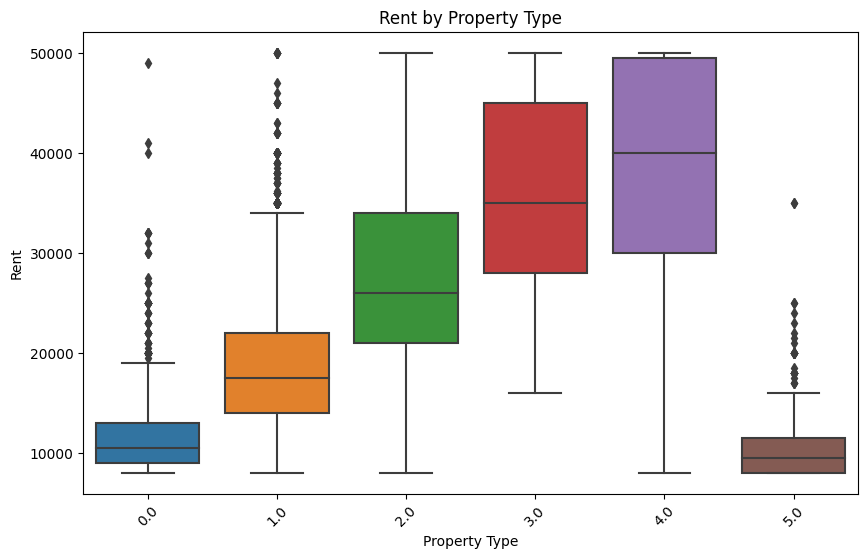

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='rent', data=df)
plt.title('Rent by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Rent')
plt.xticks(rotation=45)
plt.show()


In [46]:
# Correlation of numeric variables with rent
rent_corr = df.corr()['rent'].sort_values(ascending=False)
print(rent_corr)

# Heatmap of top correlated variables with rent


rent             1.000000
bathroom         0.677367
property_size    0.587153
LIFT             0.490022
PB               0.482612
balconies        0.472521
POOL             0.453322
GYM              0.448134
total_floor      0.436403
CLUB             0.425990
SECURITY         0.412630
FS               0.410380
INTERCOM         0.395231
type             0.349882
CPA              0.338199
VP               0.318318
HK               0.308384
floor            0.305168
RWH              0.287626
STP              0.273838
AC               0.234364
GP               0.224343
SERVANT          0.205896
longitude        0.163305
PARK             0.141558
lease_type       0.076220
facing           0.067047
negotiable       0.062798
latitude         0.033017
cup_board       -0.001259
SC              -0.009891
locality        -0.010046
property_age    -0.011020
water_supply    -0.014957
INTERNET        -0.022059
furnishing      -0.093847
building_type   -0.399469
parking         -0.494240
Name: rent, 

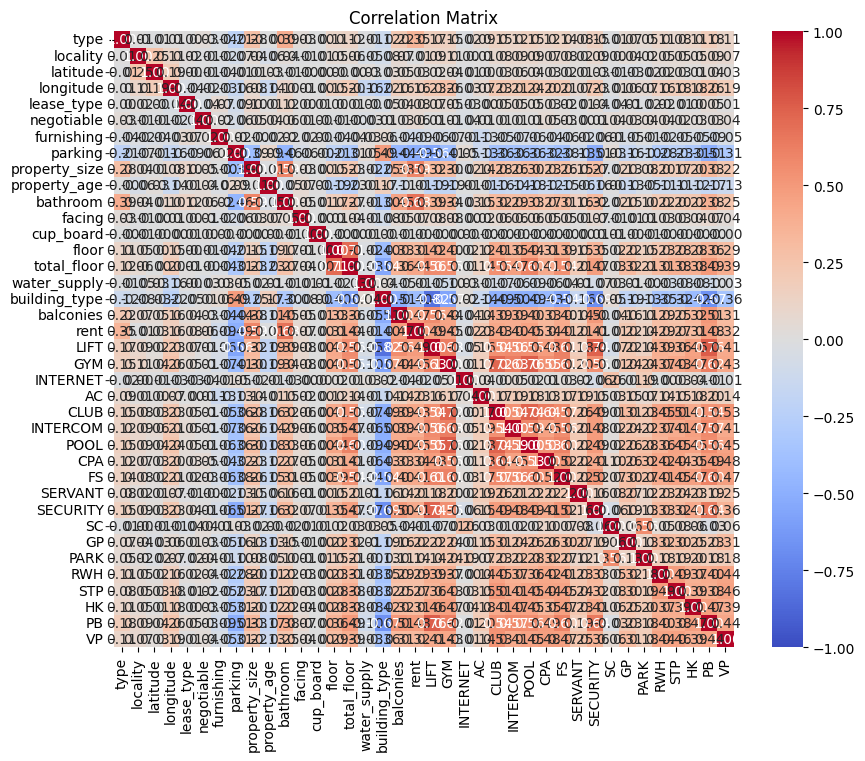

In [47]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
from pycaret.regression import *

In [ ]:
model_view=setup(data=df,target='rent')

In [ ]:
compare_models()

In [ ]:
lgbm=create_model('lightgbm')

In [ ]:
tuned_lgbm_model=tune_model(lgbm)

In [ ]:
evaluate_model(tuned_lgbm_model)

In [ ]:
predictions=predict_model(tuned_lgbm_model,data=df)

In [ ]:
final_lgbm_model=finalize_model(tuned_lgbm_model)

In [ ]:
save_model(final_lgbm_model,'lightgbm')

In [ ]:
with open('encode.pkl', 'wb') as f:
    pickle.dump(oe, f)

In [ ]:
new_data={'type':'BHK2',
          'locality':'Thiruvanmiyur',
          'activation_date':'06-12-2018 22:02:00',
          'latitude':12.98287026,
          'longitude':80.26201214,
          'lease_type':'FAMILY',
          'negotiable':0,
          'furnishing':'SEMI_FURNISHED',
          'parking':'BOTH',
          'property_size':1350,
          'property_age':6,
          'bathroom':3,
          'facing':'E',
          'cup_board':3,
          'floor':1,
          'total_floor':5,
          'water_supply':'CORP_BORE',
          'building_type':'AP',
          'balconies':3,
          'LIFT':True,
          'GYM':False,
          'INTERNET':False,
          'AC':False,
          'CLUB':False,
          'INTERCOM':False,
          'POOL':False,
          'CPA':True,
          'FS':False,
          'SERVANT':False,
          'SECURITY':False,
          'SC':True,
          'GP':False,
          'PARK':True,
          'RWH':False,
          'STP':False,
          'HK':False,
          'PB':True,
          'VP':True
          }
new_data=pd.DataFrame([new_data])
new_data['activation_date']=pd.to_datetime(new_data['activation_date'])

In [ ]:
new_data

In [ ]:
category=['type','lease_type','furnishing','parking','facing','water_supply','building_type','locality']

In [ ]:
with open('encode.pkl', 'rb') as f:
    encode = pickle.load(f)

In [ ]:
for i in category:
    print(new_data[i])
    new_data[i]=encode.fit_transform(new_data[[i]])

In [ ]:
predict_lgbm_model = load_model('lightgbm')  # Replace 'your_model_name' with the actual name of your trained model
prediction = predict_model(predict_lgbm_model, data=new_data)



In [ ]:
prediction.prediction_label